In [5]:
library(ggplot2)
library(readxl)
library(randomForest)
library(dplyr)
library(lubridate)

set.seed(123)
getwd()

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin


Attaching package: ‘dplyr’

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



[1] "/Users/seunghuilee/OneDrive/R/Rstudy_Dangsan/R1129"

In [2]:
# 데이터를 읽어온다.  중국어 인코딩 문제가 있어, 엑셀에서 1차 클렌징을 함 
dataset <- read.csv("ndouble11_test.csv", encoding = 'utf-8')

In [6]:
dataset <- as_tibble(dataset)
dataset

order_date,invoice_date,cust_id,country,SumPurchases,shipping_charge,quantity,stock_code,tax,description
<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>
2019-11-11 0:29,2019-11-11 0:30,余春枫,Chongqing,0.40,0,2,5.37183e+11,0.00,테크 울드라이 용기 1500ML 세탁세제
2019-11-11 0:29,2019-11-11 0:30,余春枫,Chongqing,0.40,0,2,5.47073e+11,0.00,테크 울드라이 1300ML
2019-11-11 0:00,2019-11-11 0:00,张嘉静,Yunnan,100.80,0,1,5.50601e+11,8.41,RE닥터그루트 지성두피용 샴푸 400ml+ RE닥터그루트 지성두피용 200ml 증정
2019-11-11 0:13,2019-11-11 0:13,褚慧芬,Zhejiang,12.23,0,1,5.86484e+11,2.59,염모제 스마트염색(원터치)_흑색
2019-10-31 17:51,2019-11-11 1:12,大熊宝殿,Guangdong,111.36,0,4,5.96291e+11,19.52,윤고 더 퍼스트 400ml+50ml(신)_기획
2019-11-11 0:02,2019-11-11 0:02,程程,Jilin,530.61,0,6,5.53141e+11,52.97,토디앙 핑크퐁 팬티 특대형 여아 36P
2019-11-11 0:25,2019-11-11 0:25,叶素梅,Guangxi,6.61,0,1,5.37183e+11,3.39,테크 울드라이 용기 1500ML 세탁세제
2019-11-11 0:25,2019-11-11 0:25,叶素梅,Guangxi,6.61,0,1,5.47073e+11,3.39,테크 울드라이 1300ML
2019-11-11 0:01,2019-11-11 0:01,张英,Zhejiang,31.00,0,1,5.86269e+11,2.59,염모제 스마트염색(원터치)_자연갈색


In [13]:
# 필요해(?)보이는 데이터를 추가해줌 (총 액은 있는데, 자재 단가는 없어서 unitprice 추가함)
# country 라고 입력된 부분을 province로 변경해줬음. (엑셀 클렌징에서 변수명을 오기입한 것임)
dataset <- dataset %>% 
 mutate(UnitPrice = SumPurchases/quantity) %>% 
 rename(province = country)

ERROR: Error in .f(.x[[i]], ...): 객체 'country'를 찾을 수 없습니다


In [32]:
# 전체 판매 금액은? 1,144,181.77 rmb
total_amount<- sum(dataset$SumPurchases)
total_amount
# 전제 제품 판매량은 30080개임
total_qty <- sum(dataset$quantity)
total_qty

[1] 1144182

[1] 30080

In [35]:
# 전체 구매 고객 수는 10357개임
n<- n_distinct(dataset$cust_id)

In [34]:
# 평균 구매 수량은 2.9개임 
total_qty/n
# 평균 객단가는?  110.47원
total_amount/n

[1] 2.904316

[1] 110.4742

In [ ]:
# 시간 시간 단위를 break down 해줌
 dataset$order_date <- as.Date(dataset$order_date)
 dataset$order_hour <- hour(dataset$invoice_date)
 dataset$order_min <- minute(dataset$invoice_date)

In [17]:
# 11일 당일 시간별로 별로 값이 얼마나 있는지 확인해줌
table(dataset$order_hour)


    0     1     2     3     5    10    13    14    18    22 
16753  2449   470    98     1     1     1     1     1     1 

In [22]:
# percentage 까지 보고싶었음. 00:00~00:59 간 매출이 82.4% 집중해있는 것을 알았음.; 진정 광클릭.
hourdata <- 
  dataset %>% 
  group_by(order_hour) %>% 
  summarise(totalqty= sum(quantity)) %>% 
  mutate(per = totalqty/sum(totalqty)*100)
hourdata

[1] 30080

order_hour,totalqty,per
<int>,<int>,<dbl>
0,24793,82.423537234
1,4377,14.551196809
2,743,2.470079787
3,159,0.528590426
5,3,0.009973404
10,1,0.003324468
13,1,0.003324468
14,1,0.003324468
18,1,0.003324468


In [39]:
# 00:00~00:59 까지는 어떤 모습일지 보고싶어졌음. 분단위로 보기로함.
# 00:00~00:05 과 00:25~00:29에 몰리는 현상을 볼 수 있었음 (30분 행사가 있었기 때문으로 판단됨)
mindata <- 
 dataset %>% 
 group_by(order_min) %>% 
 summarise(totalqty= sum(quantity)) %>% 
 mutate(per = totalqty/sum(totalqty)*100) %>% 
 arrange(desc(per))
head(mindata,10)

order_min,totalqty,per
<int>,<int>,<dbl>
0,1472,4.893617
2,1436,4.773936
3,1428,4.747340
4,1284,4.268617
1,1250,4.155585
5,1064,3.537234
27,1057,3.513963
28,1023,3.400931
29,1021,3.394282


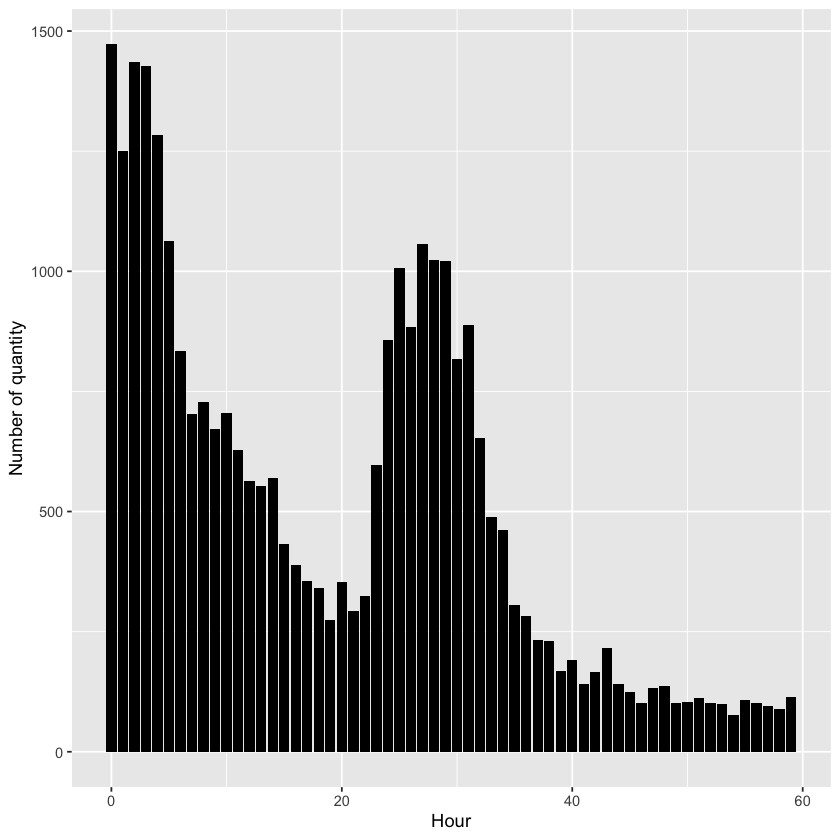

In [38]:
# 도식화해서 보고싶었음
ggplot(mindata, aes(order_min, totalqty)) +  #plot the number of invoices per day               
  geom_col(position = "dodge",fill = "black") +
 labs(x="Hour", y="Number of quantity")

In [40]:
# province 로 나눠서 보고싶었음
table(dataset$province)


        Anhui       Beijing     Chongqing        Fujian         Gansu 
          657           850           267           797            73 
    Guangdong       Guangxi       Guizhou        Hainan         Hebei 
         2406           360           152           117           534 
 Heilongjiang         Henan         Hubei         Hunan InnerMongolia 
          372           813           824           765           158 
      Jiangsu       Jiangxi         Jilin      Liaoning       Ningxia 
         1953           483           321           794            33 
      Qinghai       Shaanxi      Shandong      Shanghai        Shanxi 
           11           294          1455          1571           310 
      Sichuan       Tianjin         Tibet      Xinjiang        Yunnan 
          589           524            11           150           183 
     Zhejiang 
         1949 

In [43]:
# 좀 더?
province <- dataset %>% 
  group_by(province) %>% 
  summarize(CountCustomers = n_distinct(cust_id),
            SumPurchase = sum(SumPurchases)) %>% arrange(desc(SumPurchase)) %>% 
 head(5)

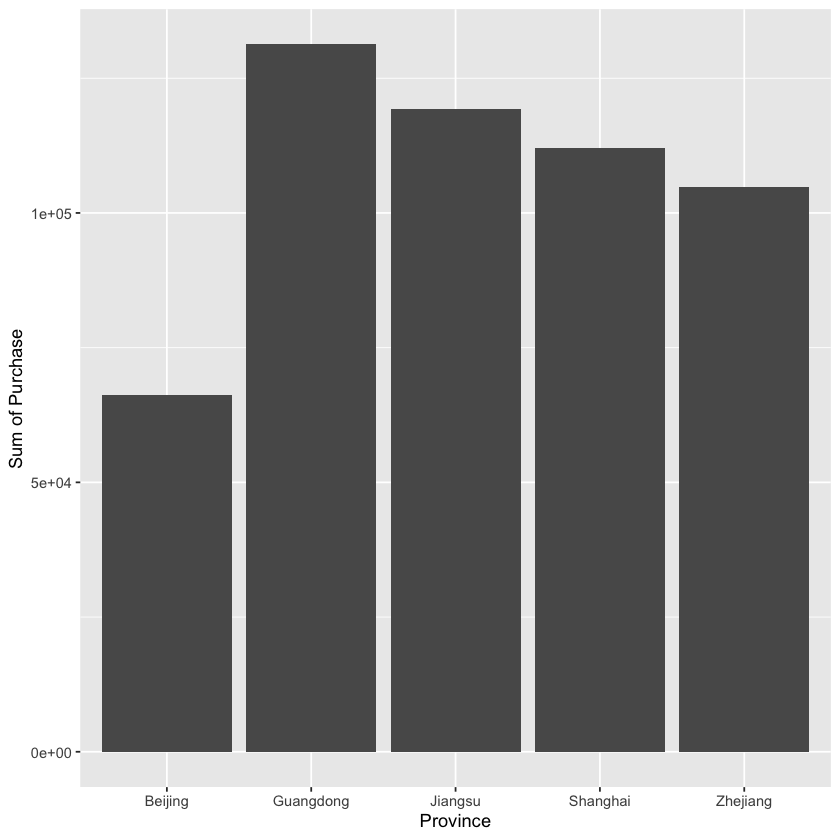

In [44]:
ggplot(province, aes(province, SumPurchase)) +  #plot the number of invoices per day               
 geom_col() +
 labs(x="Province", y="Sum of Purchase")
